# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load The Dataset

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.205017
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693389
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.915000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.450000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.330000


In [5]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Data Visualization

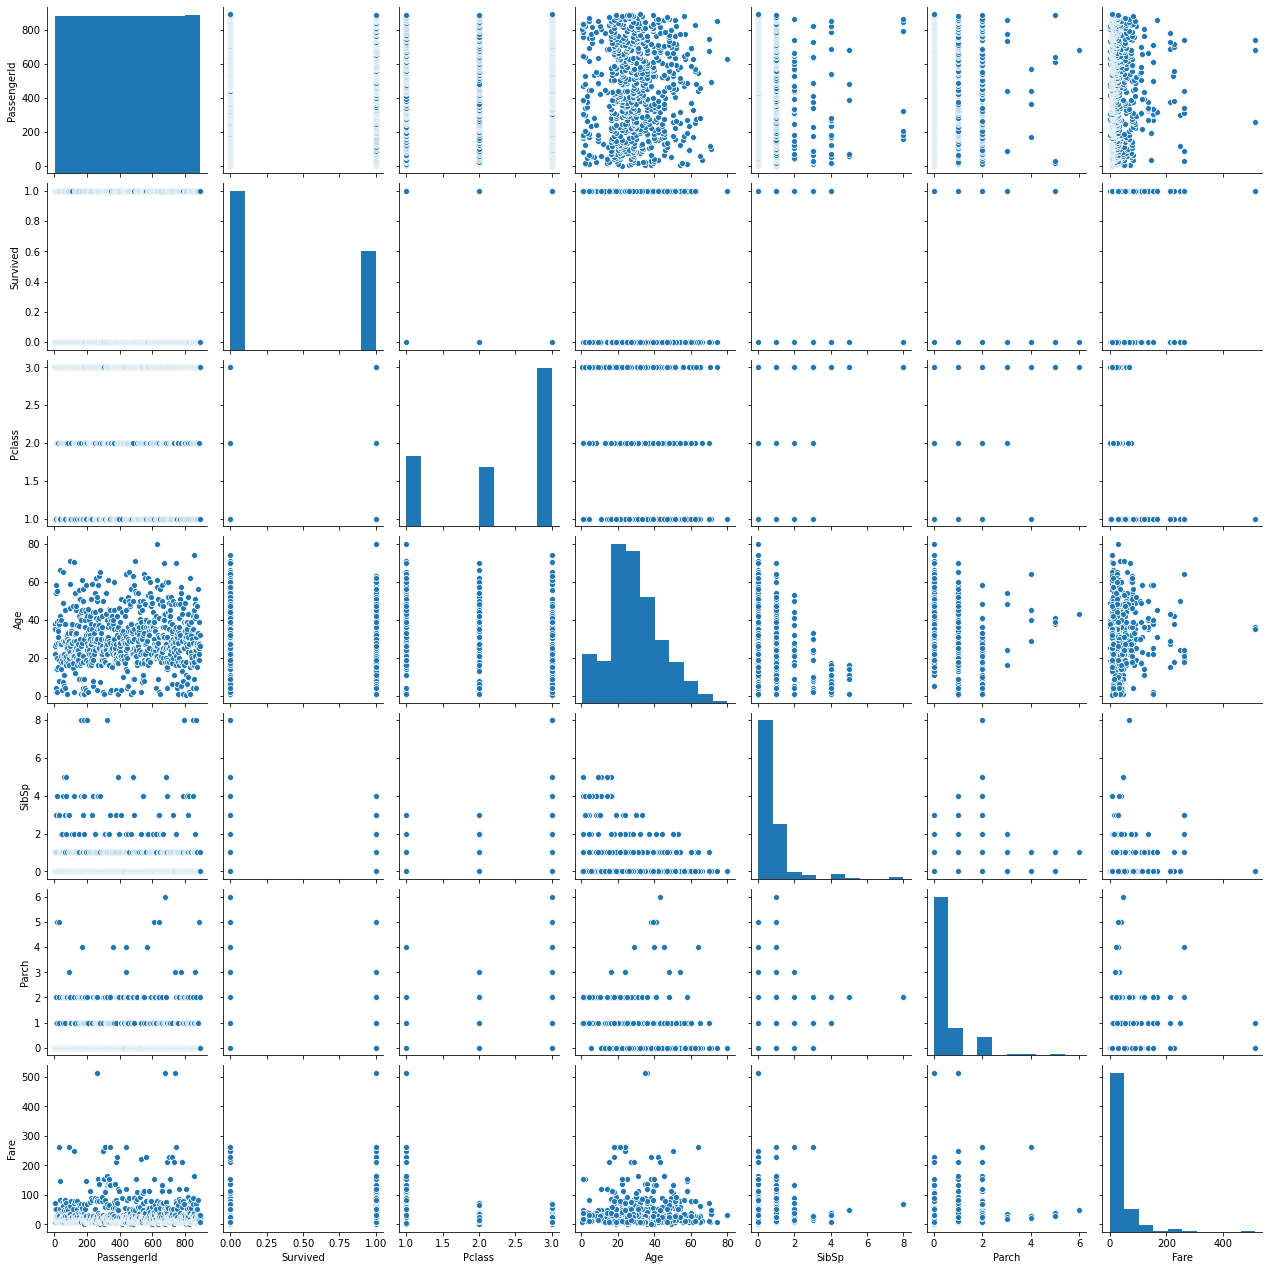

In [6]:
sns.pairplot(train)

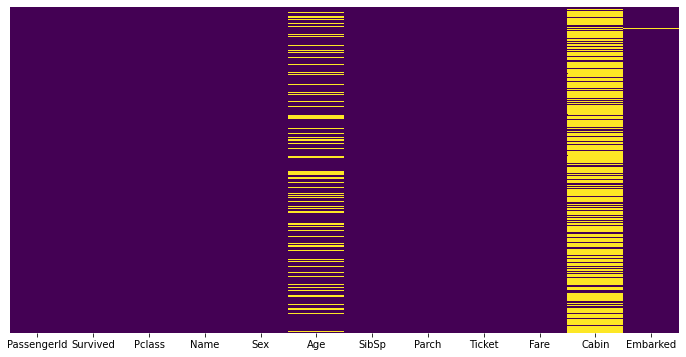

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

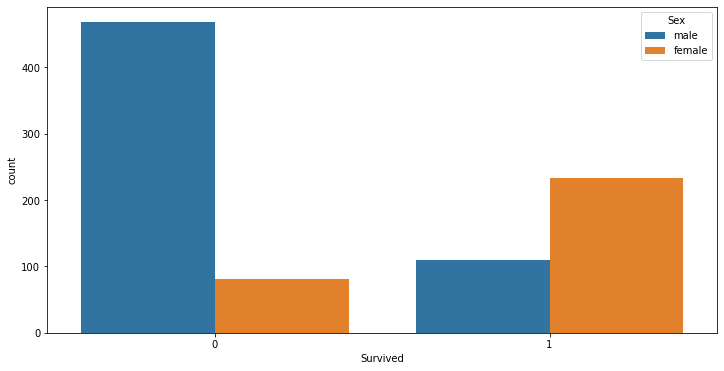

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='Survived',hue='Sex',data=train)

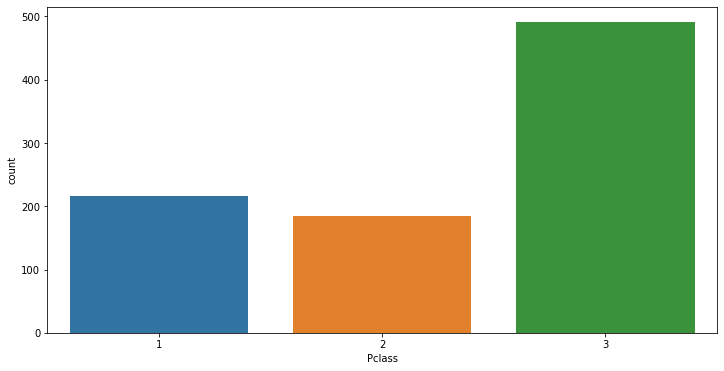

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='Pclass',data=train)

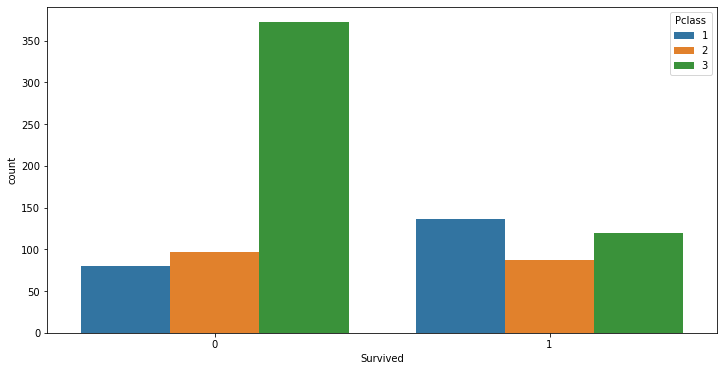

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Survived',hue='Pclass',data=train)

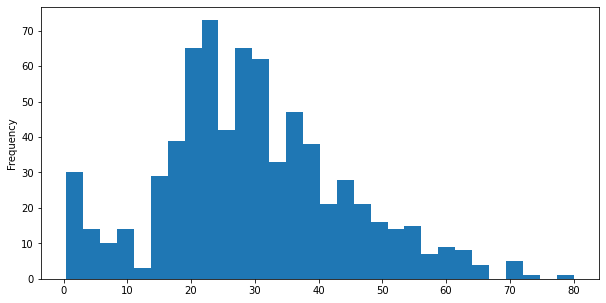

In [11]:
train['Age'].plot.hist(bins=30,figsize=(10,5))

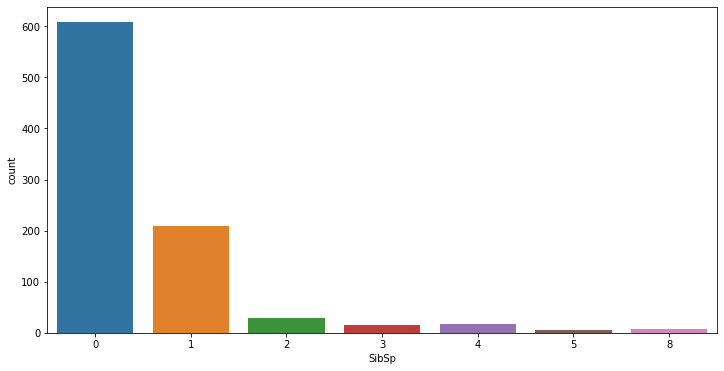

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='SibSp',data=train)

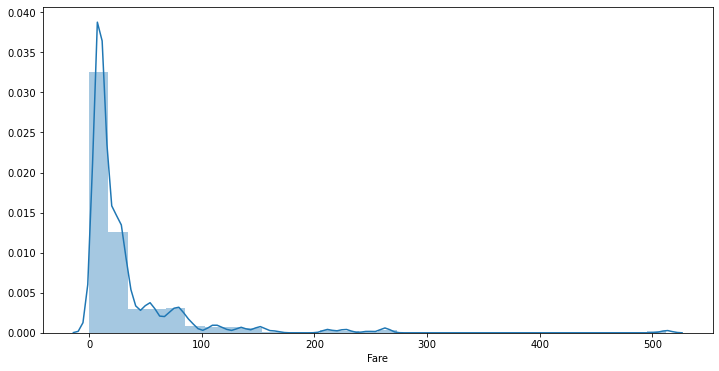

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(train['Fare'],bins=30)

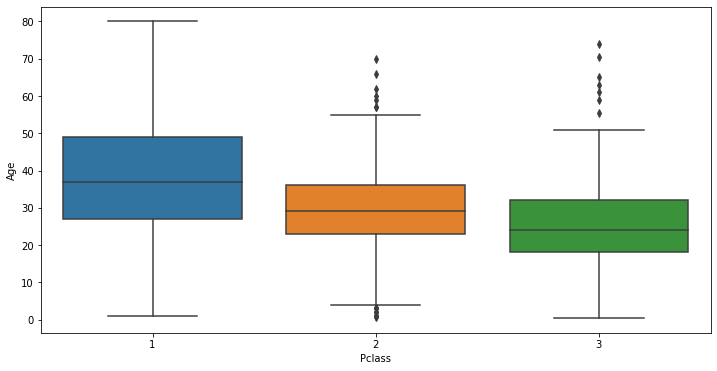

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)

# Creating a function for the missing values

In [15]:
def input_missing_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 1:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
train['Age'] = train[['Age','Pclass']].apply(input_missing_age,axis=1)

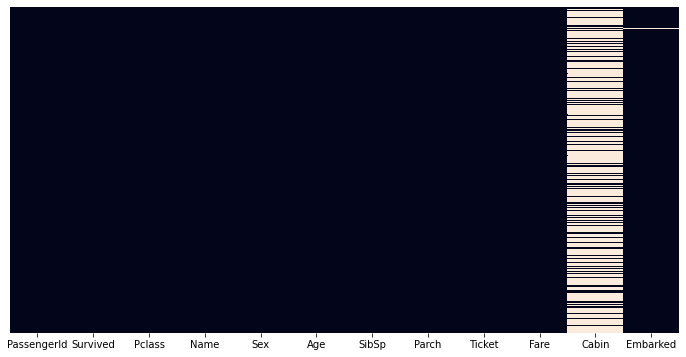

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [18]:
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train.dropna(inplace=True)

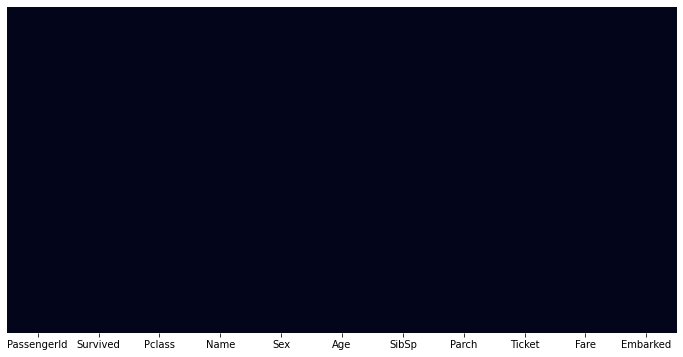

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

# Dummies Variable

In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [22]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train = pd.concat([train,sex,embarked],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.25,1,0,1
1,2,1,1,38.0,1,0,71.28,0,0,0
2,3,1,3,26.0,0,0,7.93,0,0,1
3,4,1,1,35.0,1,0,53.10,0,0,1
4,5,0,3,35.0,0,0,8.05,1,0,1


In [26]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.033323,-0.057686,-0.001657,0.012704,0.043136,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.051824,-0.034040,0.083151,0.255287,-0.541585,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.403443,0.081656,0.016824,-0.548184,0.127741,0.220558,0.076466
Age,0.033323,-0.051824,-0.403443,1.000000,-0.240368,-0.167718,0.123104,0.081997,-0.080875,0.013556
SibSp,-0.057686,-0.034040,0.081656,-0.240368,1.000000,0.414542,0.160890,-0.116348,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.167718,0.414542,1.000000,0.217536,-0.247508,-0.081585,0.061512
Fare,0.012704,0.255287,-0.548184,0.123104,0.160890,0.217536,1.000000,-0.179955,-0.116686,-0.163757
male,0.043136,-0.541585,0.127741,0.081997,-0.116348,-0.247508,-0.179955,1.000000,-0.075217,0.121405
Q,-0.033694,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116686,-0.075217,1.000000,-0.499261
S,0.022269,-0.151777,0.076466,0.013556,0.069438,0.061512,-0.163757,0.121405,-0.499261,1.000000


In [27]:
train.drop('PassengerId',axis=1,inplace=True)

In [28]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1
1,1,1,38.0,1,0,71.28,0,0,0
2,1,3,26.0,0,0,7.93,0,0,1
3,1,1,35.0,1,0,53.10,0,0,1
4,0,3,35.0,0,0,8.05,1,0,1


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30,random_state=101)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\phart\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)

# Model Evaluation

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y_test,predictions))

[[149  14]
 [ 32  72]]
